In [1]:
import pandas as pd

df = pd.read_csv('/content/Bengaluru_House_Data.csv')
display(df.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
missing_society = df['society'].isnull().sum()
percentage_missing_society = (missing_society / len(df)) * 100

print(f"Number of missing values in 'society': {missing_society}")
print(f"Percentage of missing values in 'society': {percentage_missing_society:.2f}%")

Number of missing values in 'society': 5502
Percentage of missing values in 'society': 41.31%


In [3]:
unique_societies = df['society'].unique()
print("Unique values in 'society' column:")
print(unique_societies)

print("\nValue counts for 'society' column:")
society_value_counts = df['society'].value_counts()
print(society_value_counts)

# Consider possible reasons for missing values:
print("\nPossible reasons for missing 'society' information:")
print("- The property is not part of a registered society (e.g., independent house, villa, or small building).")
print("- Data collection issues or errors.")
print("- The society name was not available or provided during data collection.")

Unique values in 'society' column:
['Coomee' 'Theanmp' nan ... 'SJovest' 'ThhtsV' 'RSntsAp']

Value counts for 'society' column:
society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
SLtalry     1
Rencyes     1
DiaveEn     1
Suiumy      1
Amionce     1
Name: count, Length: 2688, dtype: int64

Possible reasons for missing 'society' information:
- The property is not part of a registered society (e.g., independent house, villa, or small building).
- Data collection issues or errors.
- The society name was not available or provided during data collection.


In [4]:
df['society'].fillna("Unknown", inplace=True)
display(df.head())

/tmp/ipython-input-3872822652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['society'].fillna("Unknown", inplace=True)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Unknown,1200,2.0,1.0,51.00


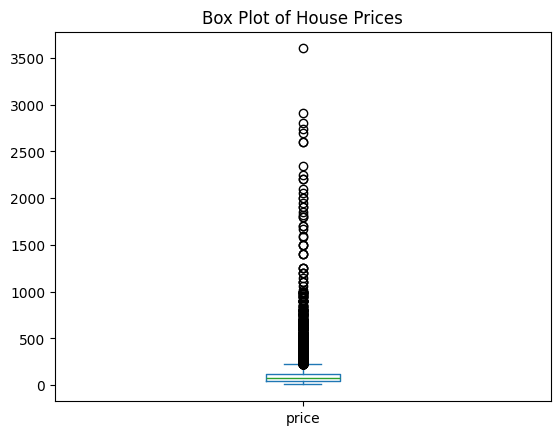

In [6]:
import matplotlib.pyplot as plt

df['price'].plot(kind='box')
plt.title("Box Plot of House Prices")
plt.show()

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

Q1 (25th percentile): 50.00
Q3 (75th percentile): 120.00
IQR (Interquartile Range): 70.00
Lower bound for outliers: -55.00
Upper bound for outliers: 225.00


In [8]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
display(outliers)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,Unknown,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770,4.0,2.0,290.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,Unknown,1200,5.0,NaN,325.0
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,Unknown,1500,9.0,2.0,250.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Unknown,3600,5.0,NaN,400.0
